In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [11]:
from Hueristic_methods.Heuristic_Method import Heuristic_Predict 

In [12]:
# Load the dataset
file_path = "datasets/Processed_Dataset_adding_priceMovementLabel.csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)


In [13]:
split_index = int(len(data) * 0.9)
training_data = data.iloc[:split_index].copy()
actual_data = data.iloc[split_index+1:].copy(deep=True)

In [14]:
Heuristic_Predict_data=Heuristic_Predict()

Heuristic Methods' Mean Squared Error: 2094458.99


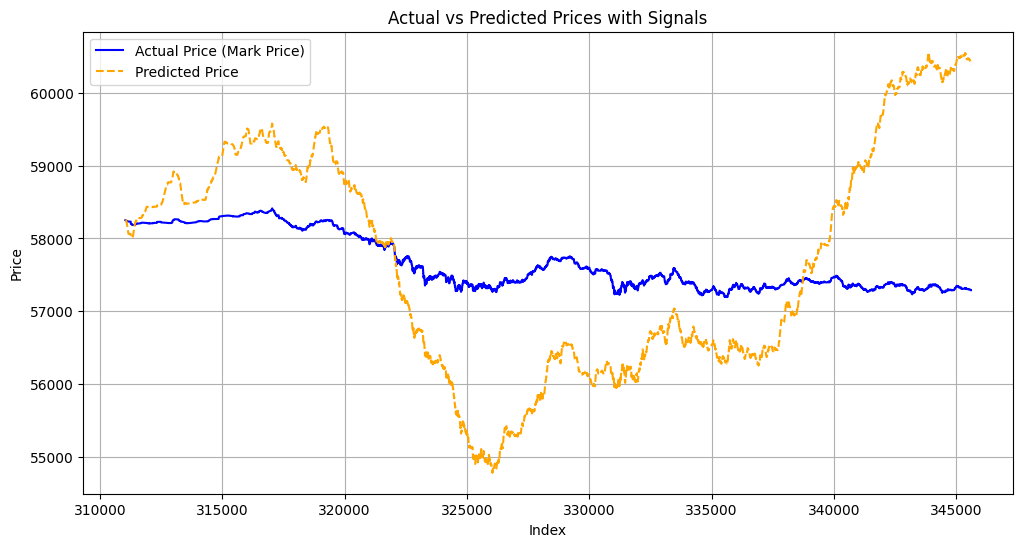

In [15]:
# Evaluate performance (Mean Squared Error) based on mark price
mse = mean_squared_error(Heuristic_Predict_data["mark_price"], Heuristic_Predict_data["predicted_price"])
print(f"Heuristic Methods' Mean Squared Error: {mse:.2f}")

# Visualize the actual vs. predicted price along with signals
plt.figure(figsize=(12, 6))
plt.plot(Heuristic_Predict_data["mark_price"], label="Actual Price (Mark Price)", color="blue")
plt.plot(Heuristic_Predict_data["predicted_price"], label="Predicted Price", color="orange", linestyle="--")
plt.title("Actual vs Predicted Prices with Signals")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


In [16]:

# Add signal distribution visualization
# X = ['Group A','Group B','Group C','Group D']
Predict_signal_counts = Heuristic_Predict_data["predict_signal"].value_counts()

Actual_signal_counts = actual_data["Price Movement"].value_counts()

# combined_counts = pd.concat([Predict_signal_counts, Actual_signal_counts], axis=1)

# Predict_signal_counts.plot(kind='bar', title="Signal Distribution", color=["blue","blue", "orange","orange", "green", "green"])
# # combined_counts.plot(kind='bar', title="Signal Distribution", color=["blue","blue", "orange","orange", "green", "green"])
# plt.xlabel("Signals")
# plt.ylabel("Frequency")
# plt.show()

In [17]:
labels = Predict_signal_counts.index.tolist()
predict_values = Predict_signal_counts.values.tolist()
actual_values = Actual_signal_counts.values.tolist()

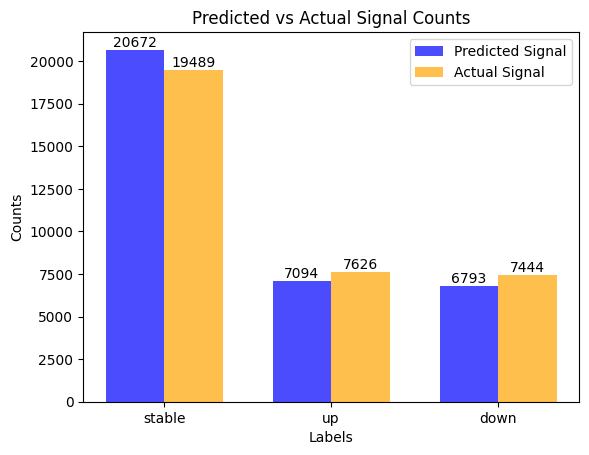

In [18]:
# Setting the positions and width for the bars
positions = np.arange(len(labels))
bar_width = 0.35

# Create the bar plot
bar1=plt.bar(positions, predict_values, bar_width, label='Predicted Signal', color='b', alpha=0.7)
bar2=plt.bar(positions + bar_width, actual_values, bar_width, label='Actual Signal', color='orange', alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Predicted vs Actual Signal Counts')
plt.xticks(positions + bar_width / 2, labels)
plt.legend()

# Displaying the values on top of each bar
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')


plt.show()